Code based on the code templates provided in the CS-C4100 - Digital Health and Human Behavior 2023 5th programming exercise - solutions are my own and are modified to correspond to the dataset at hand.

In [ ]:
!pip install liwc
!pip install vaderSentiment

In [ ]:
import json                            # For handling JSON formatted data
import os                              # Operating system dependent functionalities
import pandas as pd                    # Data manipulation and analysis library
import numpy as np                     # Numerical operations
import seaborn as sns                  # Advanced data visualization library
import matplotlib.pyplot as plt        # Plotting and visualization
import matplotlib.ticker as ticker     # Customizing tick locations and labels
from tqdm.notebook import tqdm         # Interactive progress bar
from datetime import datetime          # Date and time operations
import glob                            # Unix style pathname pattern expansion
import re                              # Regular expression operations
from collections import Counter        # Container to count occurrences
# For sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Setting up visualization properties
sns.set(font_scale=1.4, style="white")

In [ ]:
anxiety = pd.read_csv('Copy of anxiety.csv')
depression = pd.read_csv('Copy of depression_dataset.csv')

In [ ]:
anxiety.head()

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,links,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,viewCount
0,https://twitter.com/earthbirb/status/145948934...,2021-11-13 11:52:30+00:00,I would go by myself but I have anxiety 🙃,I would go by myself but I have anxiety 🙃,1.459489e+18,"{'username': 'earthbirb', 'id': 109034379, 'di...",0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1.459489e+18,"{'username': 'earthbirb', 'id': 109034379, 'di...",NaN,NaN,NaN,NaN
1,https://twitter.com/aja1979/status/14069377532...,2021-06-21 11:31:14+00:00,@anxiousleftie I know your pain you can do it ...,@anxiousleftie I know your pain you can do it ...,1.406938e+18,"{'username': 'aja1979', 'id': 112224974, 'disp...",0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,1.406850e+18,"{'username': 'anxiousleftie', 'id': 19758211, ...","[{'username': 'anxiousleftie', 'id': 19758211,...",NaN,NaN,NaN
2,https://twitter.com/basilstars0_o/status/15224...,2022-05-06 02:45:08+00:00,y'all I have anxiety + depression so it might ...,y'all I have anxiety + depression so it might ...,1.522407e+18,"{'username': 'basilstars0_o', 'id': 1341138153...",0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,{'url': 'https://twitter.com/basilstars0_o/sta...,NaN,NaN,NaN,NaN,NaN,NaN
3,https://twitter.com/a_nthna/status/13367928063...,2020-12-09 22:00:16+00:00,@cvntlovesyou I like dark souls but I have anx...,@cvntlovesyou I like dark souls but I have anx...,1.336793e+18,"{'username': 'a_nthna', 'id': 1282888266, 'dis...",0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1.336793e+18,"{'username': 'cvntlovesyou', 'id': 3242041253,...","[{'username': 'cvntlovesyou', 'id': 3242041253...",NaN,NaN,NaN
4,https://twitter.com/e_mariek/status/1071446918...,2018-12-08 16:50:26+00:00,My wonderful husband accidentally dropped a pl...,My wonderful husband accidentally dropped a pl...,1.071447e+18,"{'username': 'e_mariek', 'id': 106141412699438...",0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
depression.head()

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,links,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,viewCount
0,https://twitter.com/KarlWomack3/status/1486792...,2022-01-27 20:04:58+00:00,@FraserNelson At 23 I was forced into making t...,@FraserNelson At 23 I was forced into making t...,1.486792e+18,"{'username': 'KarlWomack3', 'id': 906173065356...",1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1.486792e+18,"{'username': 'KarlWomack3', 'id': 906173065356...","[{'username': 'FraserNelson', 'id': 117366399,...",NaN,NaN,NaN
1,https://twitter.com/grffy/status/1442003733307...,2021-09-26 05:50:55+00:00,i have depression after watching season 4 of d...,i have depression after watching season 4 of d...,1.442004e+18,"{'username': 'grffy', 'id': 2416465698, 'displ...",3.0,0.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://twitter.com/kaeyamiwk/status/148841474...,2022-02-01 07:31:42+00:00,pretty sure i have depression but maybe its ju...,pretty sure i have depression but maybe its ju...,1.488415e+18,"{'username': 'kaeyamiwk', 'id': 10851502927635...",0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://twitter.com/Renkindle/status/110385307...,2019-03-08 03:00:56+00:00,"@BA5ILEUS I strive to be like this, half becau...","@BA5ILEUS I strive to be like this, half becau...",1.103853e+18,"{'username': 'Renkindle', 'id': 2799207292, 'd...",1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,1.103851e+18,"{'username': 'mongreltooth', 'id': 2410343796,...","[{'username': 'BA5ILEUS', 'id': 4394084979, 'd...",NaN,NaN,NaN
4,https://twitter.com/deadmanspartys/status/1367...,2021-03-05 23:20:08+00:00,i have adhd benrey has adhd i have depression ...,i have adhd benrey has adhd i have depression ...,1.367978e+18,"{'username': 'deadmanspartys', 'id': 126759967...",0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,{'url': 'https://twitter.com/deadmanspartys/st...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.options.display.max_colwidth = 500
anxiety['renderedContent'].head(25)

0                                                                                                                                                                                                                                                                    I would go by myself but I have anxiety 🙃
1                                                                                                                                                                   @anxiousleftie I know your pain you can do it I did and I have anxiety and ptsd due to medical problems in my life so if I can so can you.
2                                                                                                                                                                                               y'all I have anxiety + depression so it might not be autism just so I can get help instead of being ignored 😍😍
3                                                                                          

In [ ]:
depression['renderedContent'].head(25)

0                                                                                             @FraserNelson At 23 I was forced into making the decision to move into residential care the bullying stopped at the age of 40. I was diagnosed with depression and developed autistic trates.
1                                                                                                                                                                                                                                       i have depression after watching season 4 of dexter
2                                                                                                                                                                                                                        pretty sure i have depression but maybe its just me being lazy idk
3                                                                                                                @BA5ILEUS I strive to be like this,

In [ ]:
print(depression.info())
print(anxiety.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35101 entries, 0 to 35100
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               35101 non-null  object 
 1   date              35101 non-null  object 
 2   rawContent        35101 non-null  object 
 3   renderedContent   35100 non-null  object 
 4   id                35100 non-null  float64
 5   user              35100 non-null  object 
 6   replyCount        35100 non-null  float64
 7   retweetCount      35100 non-null  float64
 8   likeCount         35100 non-null  float64
 9   quoteCount        35100 non-null  float64
 10  conversationId    35100 non-null  float64
 11  lang              35100 non-null  object 
 12  source            35100 non-null  object 
 13  sourceUrl         35100 non-null  object 
 14  sourceLabel       35100 non-null  object 
 15  links             1185 non-null   object 
 16  media             2551 non-null   object

In [ ]:
depression.isnull().sum()

url                     0
date                    0
rawContent              0
renderedContent         1
id                      1
user                    1
replyCount              1
retweetCount            1
likeCount               1
quoteCount              1
conversationId          1
lang                    1
source                  1
sourceUrl               1
sourceLabel             1
links               33916
media               32550
retweetedTweet      35101
quotedTweet         32762
inReplyToTweetId    21032
inReplyToUser       21032
mentionedUsers      23306
coordinates         34315
place               34315
viewCount           34427
dtype: int64

In [ ]:
anxiety.isnull().sum()

url                     0
date                    0
rawContent              1
renderedContent         2
id                      2
user                    2
replyCount              2
retweetCount            2
likeCount               2
quoteCount              2
conversationId          2
lang                    2
source                  2
sourceUrl               2
sourceLabel             2
links               68240
media               66386
retweetedTweet      69946
quotedTweet         65840
inReplyToTweetId    42713
inReplyToUser       42713
mentionedUsers      47276
coordinates         67971
place               67971
viewCount           68322
dtype: int64

In [ ]:
anxiety = anxiety[anxiety['rawContent'].notna()]

In [ ]:
anxiety.isnull().sum()

url                     0
date                    0
rawContent              0
renderedContent         1
id                      1
user                    1
replyCount              1
retweetCount            1
likeCount               1
quoteCount              1
conversationId          1
lang                    1
source                  1
sourceUrl               1
sourceLabel             1
links               68239
media               66385
retweetedTweet      69945
quotedTweet         65839
inReplyToTweetId    42712
inReplyToUser       42712
mentionedUsers      47275
coordinates         67970
place               67970
viewCount           68321
dtype: int64

In [ ]:
def pre_processing(text):
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/\S+', '', text)

    # Remove mentions (@)
    text = re.sub(r'@[A-Za-z0-9]+', '', text)

    # Remove newline character
    text = re.sub(r'\n','', text)

    # Everything except letters, numbers, and hashtags are replaced with a space.
    text = re.sub(r"[^A-Za-z0-9#]+", ' ', text)

    # Remove any extra spaces between words, and trailing or leading spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

depression['tweetCleaned'] = depression['rawContent'].apply(pre_processing)
anxiety['tweetCleaned'] = anxiety['rawContent'].apply(pre_processing)

In [ ]:
depression.retweetedTweet.unique()

array([nan])

In [ ]:
import nltk
from nltk.corpus import stopwords

import ssl
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = stopwords.words("english")

In [ ]:
def remove_stopwords(text):
    tokens_list = text.split()

    lc_tokens_list = []
    for i in tokens_list:
        lc_tokens_list.append(i.lower())

    filtered_text = [token for token in lc_tokens_list if token not in stopwords]

    return ' '.join(filtered_text)

In [ ]:
depression['text_non_stop']=depression['tweetCleaned'].apply(remove_stopwords)
anxiety['text_non_stop']=anxiety['tweetCleaned'].apply(remove_stopwords)

In [ ]:
depression[['rawContent', 'tweetCleaned','text_non_stop']].head()

,rawContent,tweetCleaned,text_non_stop
0,@FraserNelson At 23 I was forced into making the decision to move into residential care the bullying stopped at the age of 40. I was diagnosed with depression and developed autistic trates.,At 23 I was forced into making the decision to move into residential care the bullying stopped at the age of 40 I was diagnosed with depression and developed autistic trates,23 forced making decision move residential care bullying stopped age 40 diagnosed depression developed autistic trates
1,i have depression after watching season 4 of dexter,i have depression after watching season 4 of dexter,depression watching season 4 dexter
2,pretty sure i have depression but maybe its just me being lazy idk,pretty sure i have depression but maybe its just me being lazy idk,pretty sure depression maybe lazy idk
3,"@BA5ILEUS I strive to be like this, half because my friends are happy and i like seeing them happy, and half because i have depression and trying to be over the top helps",I strive to be like this half because my friends are happy and i like seeing them happy and half because i have depression and trying to be over the top helps,strive like half friends happy like seeing happy half depression trying top helps
4,i have adhd benrey has adhd i have depression w/ psychotic features he has depression w/ psychotic features....... we r the same because i said so,i have adhd benrey has adhd i have depression w psychotic features he has depression w psychotic features we r the same because i said so,adhd benrey adhd depression w psychotic features depression w psychotic features r said


In [ ]:
anxiety[['rawContent', 'tweetCleaned','text_non_stop']].head()

,rawContent,tweetCleaned,text_non_stop
0,I would go by myself but I have anxiety 🙃,I would go by myself but I have anxiety,would go anxiety
1,@anxiousleftie I know your pain you can do it I did and I have anxiety and ptsd due to medical problems in my life so if I can so can you.,I know your pain you can do it I did and I have anxiety and ptsd due to medical problems in my life so if I can so can you,know pain anxiety ptsd due medical problems life
2,y'all I have anxiety + depression so it might not be autism just so I can get help instead of being ignored 😍😍,y all I have anxiety depression so it might not be autism just so I can get help instead of being ignored,anxiety depression might autism get help instead ignored
3,@cvntlovesyou I like dark souls but I have anxiety and the game males me cry,I like dark souls but I have anxiety and the game males me cry,like dark souls anxiety game males cry
4,"My wonderful husband accidentally dropped a plate in the sink while washing dishes this early morning &amp, woke me up with a mini heart attack. Now I have anxiety and he’s gone to work 😭 #why #dontleaveme",My wonderful husband accidentally dropped a plate in the sink while washing dishes this early morning amp woke me up with a mini heart attack Now I have anxiety and he s gone to work #why #dontleaveme,wonderful husband accidentally dropped plate sink washing dishes early morning amp woke mini heart attack anxiety gone work #why #dontleaveme


In [ ]:
depression['word_count'] = None
anxiety['word_count'] = None

def count_words(text):
    return len(str(text).split())

depression['word_count'] = depression['tweetCleaned'].apply(lambda x: count_words(x))
anxiety['word_count'] = anxiety['tweetCleaned'].apply(lambda x: count_words(x))

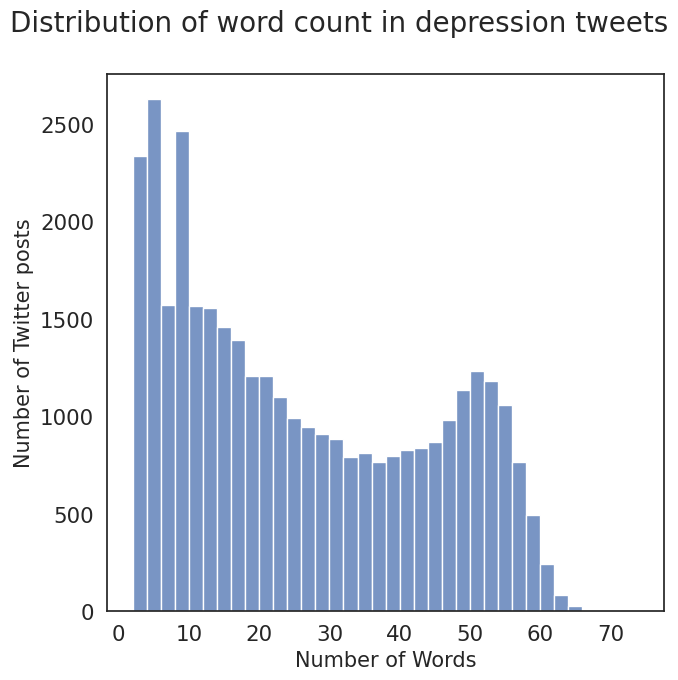

In [ ]:
plt.figure(figsize=(7,7))
ax = sns.histplot(data=depression, x="word_count", binwidth=2)
ax.set_xlabel("Number of Words",fontsize=15)
ax.set_ylabel("Number of Twitter posts",fontsize=15)

plt.suptitle("Distribution of word count in depression tweets", fontsize=20)
plt.tight_layout()
plt.show()

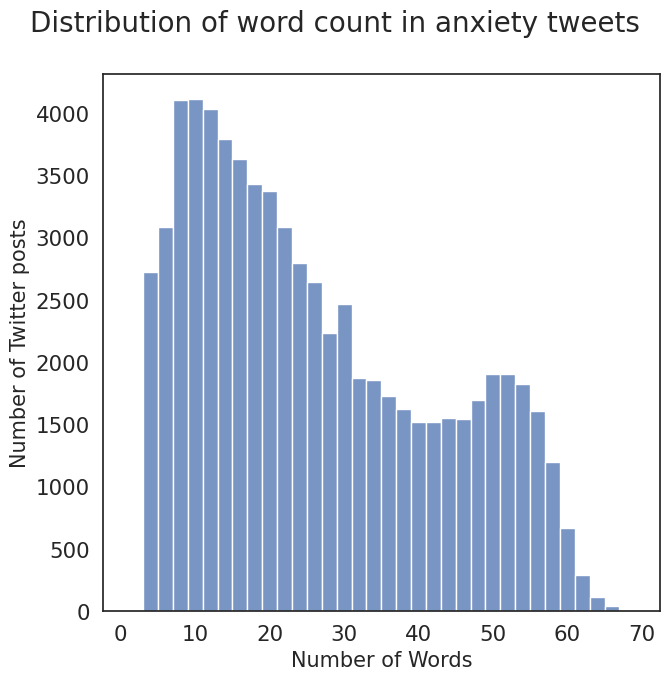

In [ ]:
plt.figure(figsize=(7,7))
ax = sns.histplot(data=anxiety, x="word_count", binwidth=2)
ax.set_xlabel("Number of Words",fontsize=15)
ax.set_ylabel("Number of Twitter posts",fontsize=15)

plt.suptitle("Distribution of word count in anxiety tweets", fontsize=20)
plt.tight_layout()
plt.show()

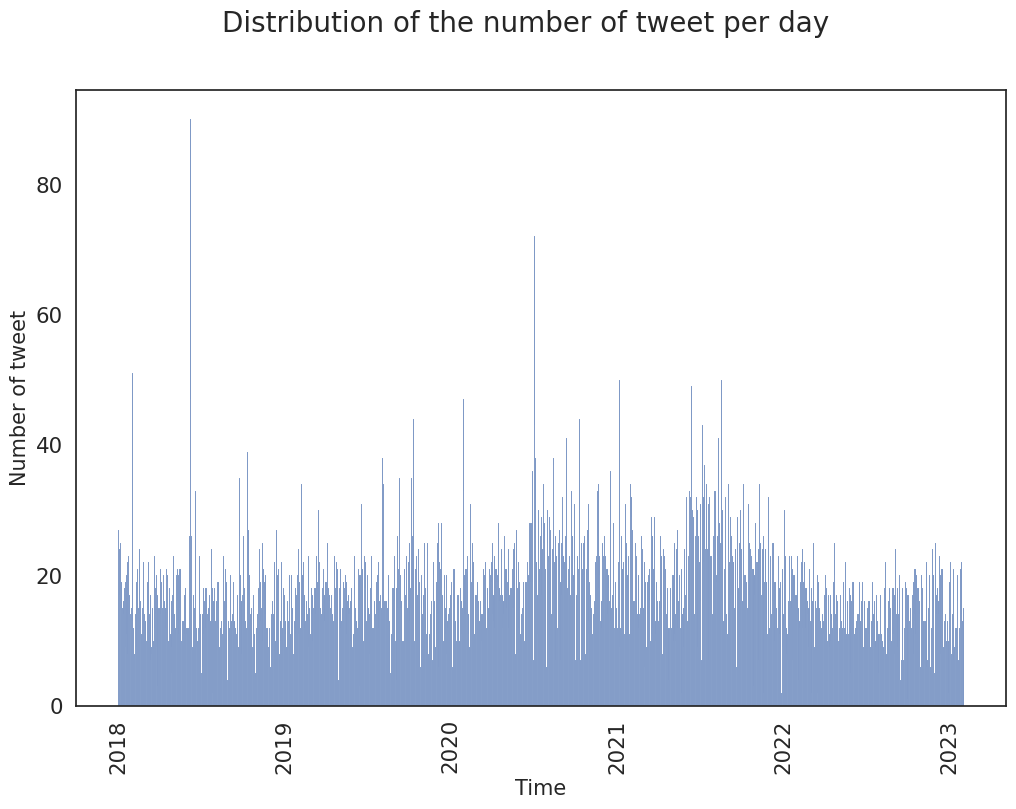

In [ ]:
depression['date_no_time'] = pd.to_datetime(depression['date']).dt.date
anxiety['date_no_time'] = pd.to_datetime(anxiety['date']).dt.date


plt.figure(figsize=(12,8))

ax = sns.histplot(data=depression, x="date_no_time")

ax.set_xlabel("Time",fontsize=15)
ax.set_ylabel("Number of tweet",fontsize=15)

plt.suptitle("Distribution of the number of tweet per day", fontsize=20)
plt.xticks(rotation=90)
plt.show()

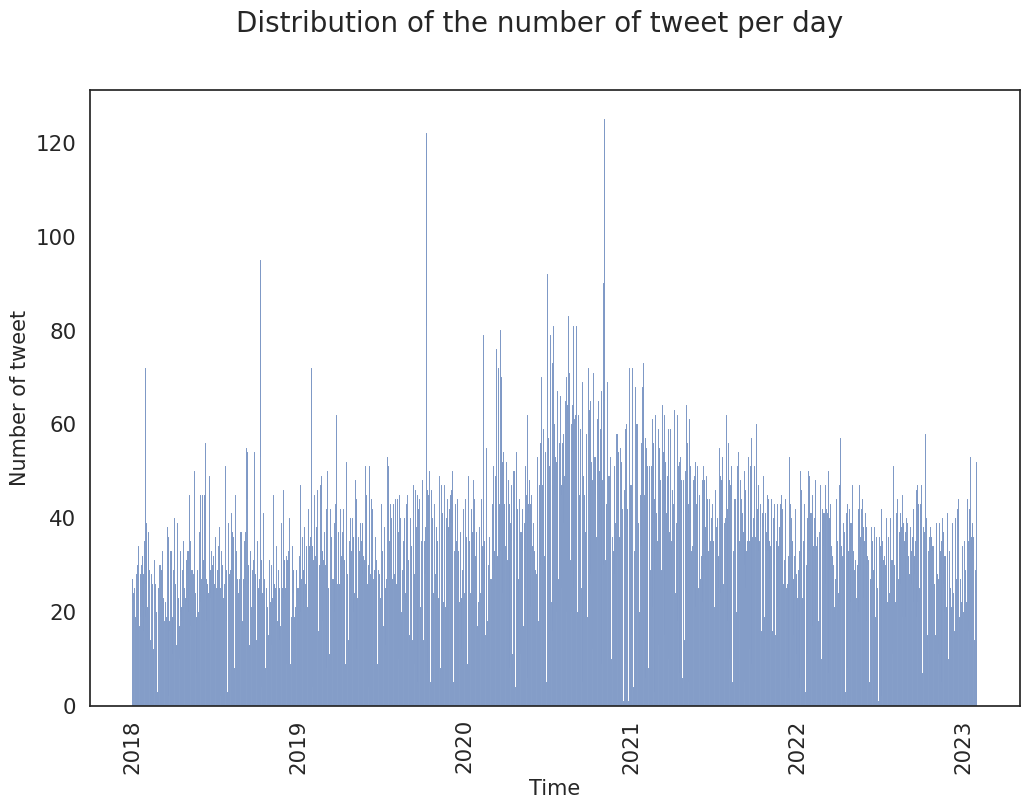

In [ ]:
plt.figure(figsize=(12,8))

ax = sns.histplot(data=anxiety, x="date_no_time")

ax.set_xlabel("Time",fontsize=15)
ax.set_ylabel("Number of tweet",fontsize=15)

plt.suptitle("Distribution of the number of tweet per day", fontsize=20)
plt.xticks(rotation=90)
plt.show()

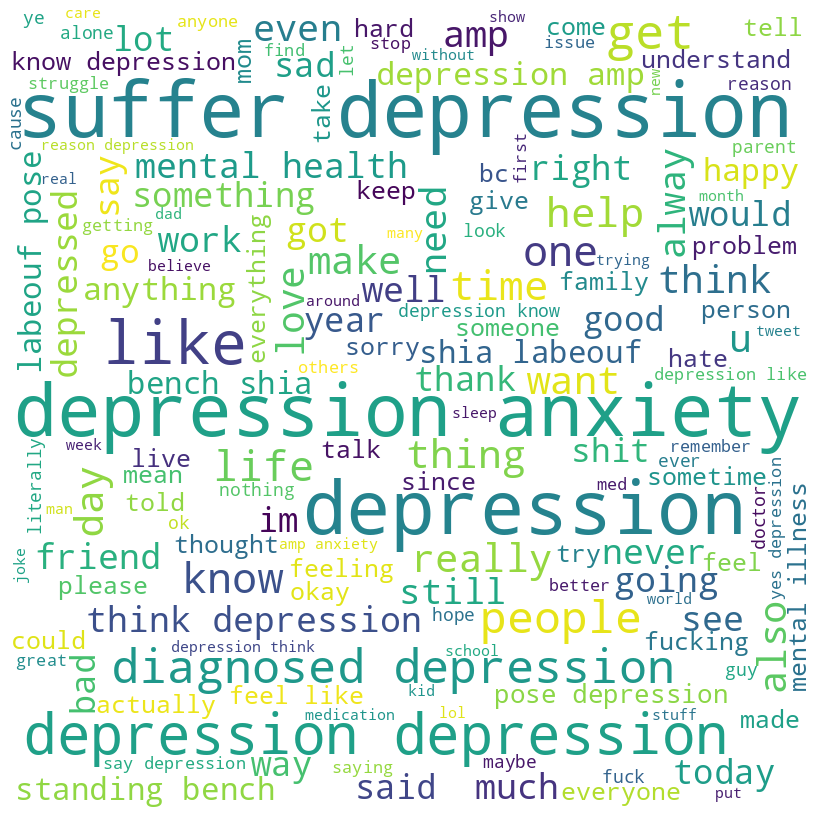

In [ ]:
from wordcloud import WordCloud

comment_words = ''

for sentence in depression.text_non_stop:


    sentence = str(sentence)


    words = sentence.split()

    for i in range(len(words)):
        words[i] = words[i].lower()

    comment_words += " ".join(words)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 15).generate(comment_words)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

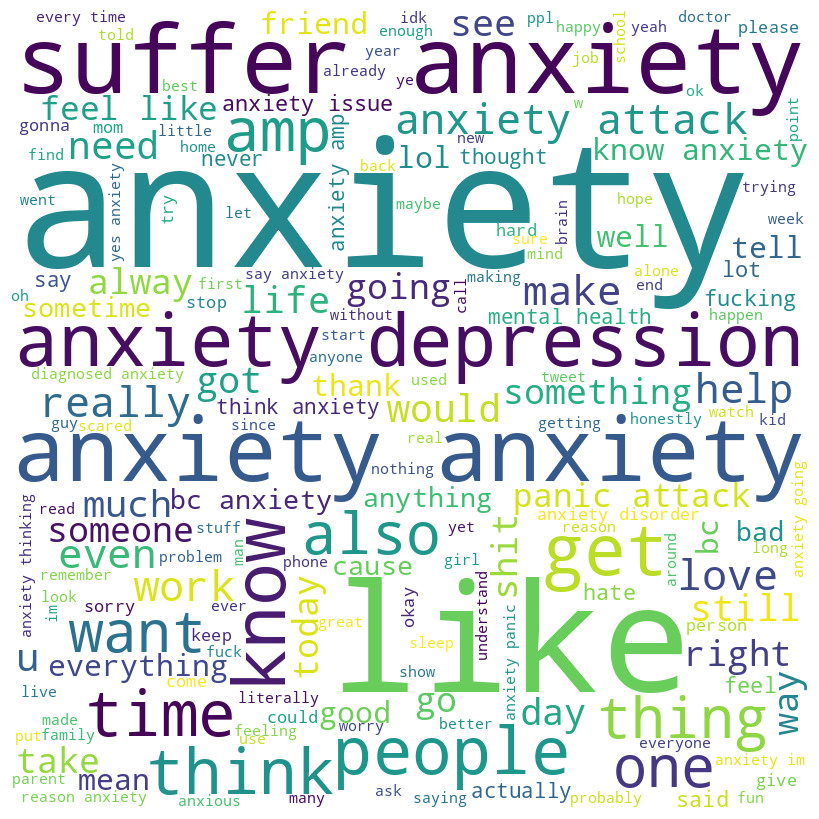

In [ ]:

comment_words = ''

for sentence in anxiety.text_non_stop:

    sentence = str(sentence)

    words = sentence.split()

    for i in range(len(words)):
        words[i] = words[i].lower()

    comment_words += " ".join(words)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 15).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
# Create custom lists for depression and anxiety
depression_stopwords = stopwords + ['depression'] + ['like']
anxiety_stopwords = stopwords + ['anxiety'] + ['like']

In [ ]:
def remove_depression_stopwords(text):

    tokens_list = text.split()

    lc_tokens_list = []
    for i in tokens_list:
        lc_tokens_list.append(i.lower())

    filtered_text = [token for token in lc_tokens_list if token not in depression_stopwords]

    return ' '.join(filtered_text)

def remove_anxiety_stopwords(text):

    tokens_list = text.split()

    lc_tokens_list = []
    for i in tokens_list:
        lc_tokens_list.append(i.lower())

    filtered_text = [token for token in lc_tokens_list if token not in anxiety_stopwords]

    return ' '.join(filtered_text)

In [ ]:
depression['text_non_depression_stop']=depression['tweetCleaned'].apply(remove_depression_stopwords)
anxiety['text_non_anxiety_stop']=anxiety['tweetCleaned'].apply(remove_anxiety_stopwords)

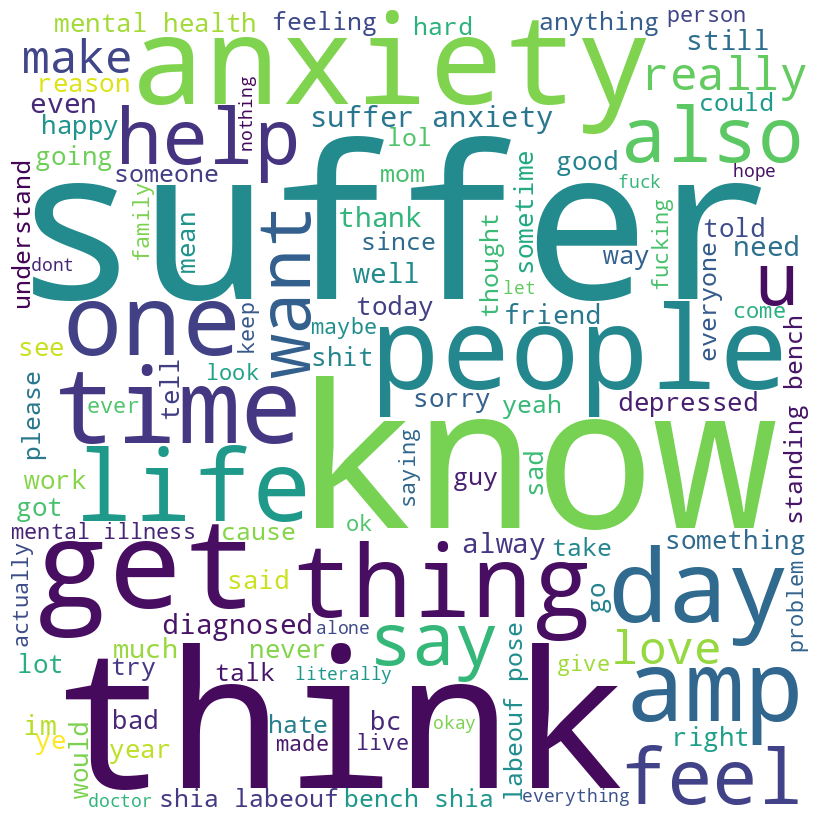

In [ ]:
comment_words = ''

for sentence in depression.text_non_depression_stop:

    sentence = str(sentence)

    words = sentence.split()

    for i in range(len(words)):
        words[i] = words[i].lower()

    comment_words += " ".join(words)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 15).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

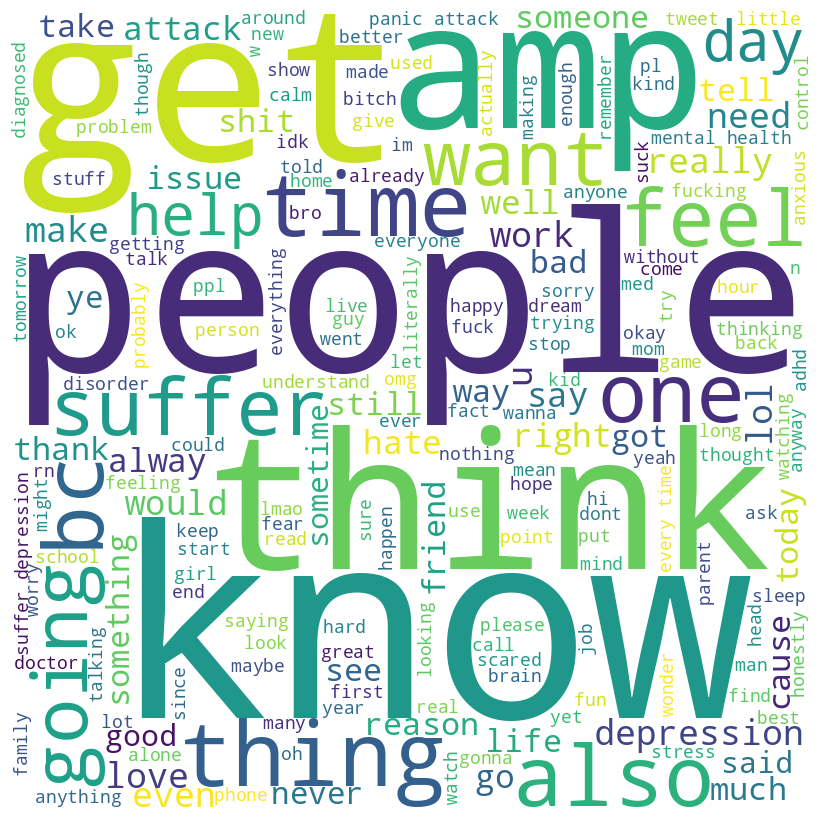

In [ ]:
comment_words = ''

for sentence in anxiety.text_non_anxiety_stop:


    sentence = str(sentence)


    words = sentence.split()


    for i in range(len(words)):
        words[i] = words[i].lower()

    comment_words += " ".join(words)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 15).generate(comment_words)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

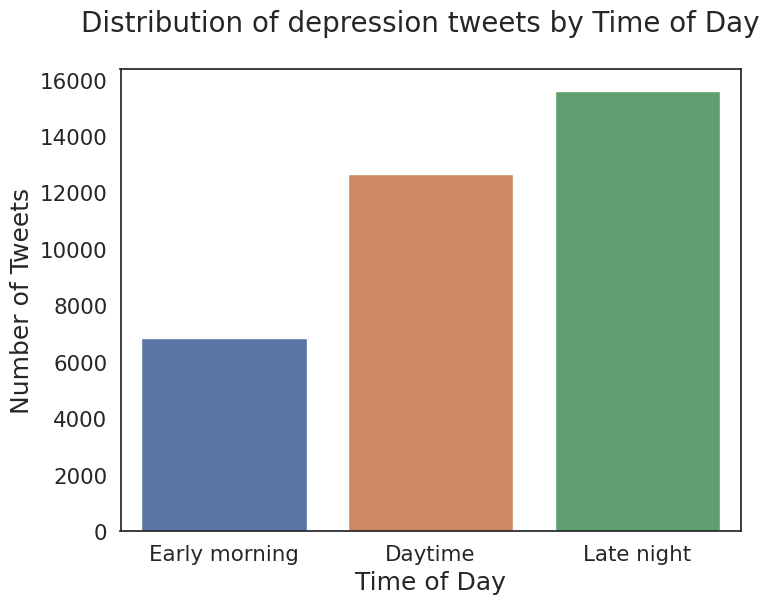

In [ ]:
depression['hour'] = pd.to_datetime(depression['date']).dt.hour

def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Early morning'
    elif 12 <= hour < 20:
        return 'Daytime'
    else:
        return 'Late night'

depression['time_of_day'] = depression['hour'].apply(categorize_time_of_day)


plt.figure(figsize=(8, 6))
ax = sns.countplot(data=depression, x='time_of_day', order=['Early morning', 'Daytime', 'Late night'])
plt.suptitle("Distribution of depression tweets by Time of Day", fontsize=20)
ax.set_xlabel("Time of Day", fontsize=18)
ax.set_ylabel("Number of Tweets", fontsize=18)
plt.show()

In [ ]:
depression['date']

0        2022-01-27 20:04:58+00:00
1        2021-09-26 05:50:55+00:00
2        2022-02-01 07:31:42+00:00
3        2019-03-08 03:00:56+00:00
4        2021-03-05 23:20:08+00:00
                   ...            
35096    2020-06-27 13:51:46+00:00
35097    2018-02-01 16:23:49+00:00
35098    2020-04-07 22:53:45+00:00
35099    2022-10-16 12:49:23+00:00
35100    2020-01-17 09:15:46+00:00
Name: date, Length: 35101, dtype: object

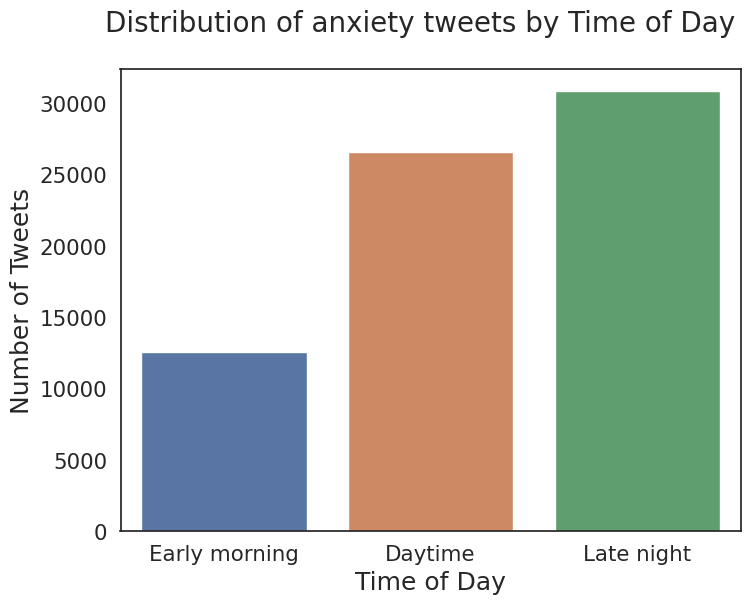

In [ ]:
anxiety['hour'] = pd.to_datetime(anxiety['date']).dt.hour

anxiety['time_of_day'] = anxiety['hour'].apply(categorize_time_of_day)

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=anxiety, x='time_of_day', order=['Early morning', 'Daytime', 'Late night'])
plt.suptitle("Distribution of anxiety tweets by Time of Day", fontsize=20)
ax.set_xlabel("Time of Day", fontsize=18)
ax.set_ylabel("Number of Tweets", fontsize=18)
plt.show()

In [ ]:
DATA = '/content/drive/MyDrive/Digital Health/LIWC.dic'
from collections import Counter

# Import the LIWC Python library.
# sources:: https://github.com/chbrown/liwc-python
import liwc

# Define a function to tokenize a given text.
def tokenize(text):
    """
    Tokenizes the input text based on word boundaries.

    Parameters:
    - text (str): The input text to be tokenized.

    Yields:
    - str: Tokens (words) from the input text.
    """

    # Use regular expressions to identify word patterns in the text.
    # The pattern r'\w+' matches sequences of word characters.
    for match in re.finditer(r'\w+', text, re.UNICODE):
        yield match.group(0)

# Define a function to perform LIWC analysis on a given text.
def LIWC_analysis(text, parse):
    """
    Analyzes the input text using the LIWC tool and returns counts of words in various LIWC categories.

    Parameters:
    - text (str): The input text to be analyzed.
    - parse (function): The LIWC parser function.

    Returns:
    - Counter: A counter object with counts of words in various LIWC categories.
    refs of Counter object: https://www.geeksforgeeks.org/python-counter-objects-elements/
    """
    # Convert the text to lowercase.
    text = text.lower()

    # Tokenize the text.
    sentence_token = tokenize(text)

    # Count occurrences of words in various LIWC categories.
    sentence_counts = Counter(category for token in sentence_token for category in parse(token))

    return sentence_counts

# Load the LIWC dictionary and create a token parser.
# The parser will be used to classify words into various LIWC categories.
parse, category_names = liwc.load_token_parser(DATA)

In [ ]:
def add_LIWC_score(df, parse, category_names):
    """
    Add LIWC scores to the dataframe for each text content in the 'text_cleaned' column.

    Parameters:
    - df (DataFrame): The input dataframe containing the 'text_cleaned' column.
    - parse (function): The LIWC parser function.
    - category_names (list): List of LIWC category names.

    Returns:
    - DataFrame: A dataframe enriched with LIWC scores.
    """

    # Create a deep copy of the dataframe to prevent modifying the original dataframe.
    df_cp = df.copy(deep=True)

    # Initialize columns for each LIWC category with zeros.
    for category in category_names:
        df_cp[category] = 0

    # Iterate through each row of the dataframe.
    for row in df_cp.itertuples():

        # Analyze the 'text_cleaned' content using the LIWC tool.
        score = LIWC_analysis(row.tweetCleaned, parse)

        # Update the LIWC scores in the dataframe for the current row.
        df_cp.loc[row.Index, list(score.keys())] = list(score.values())

    return df_cp

In [ ]:
# Creating copy of df for LIWC
depression_LIWC = add_LIWC_score(depression, parse, category_names)
depression_LIWC[category_names].head()

anxiety_LIWC = add_LIWC_score(anxiety, parse, category_names)
anxiety_LIWC[category_names].head()

,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,...,work,achiev,leisure,home,money,relig,death,assent,nonflu,filler
0,7,0,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22,3,8,5,0,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,2,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,3,3,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
4,15,1,3,3,0,0,1,0,1,3,...,1,1,0,0,0,0,0,0,0,0


In [ ]:
depression_LIWC['date'] = pd.to_datetime(depression_LIWC['date'])

# Aggregate the LIWC scores and word counts on a weekly basis using 'date' as the grouping key.
# The 'W-MON' frequency ensures weeks start on a Monday.
# The result is then sorted by 'date'.
depression_LIWC_weekly_sum = depression_LIWC[category_names + ['date', 'word_count']] \
    .groupby(pd.Grouper(key='date', freq='W-MON')) \
    .sum() \
    .reset_index() \
    .sort_values('date')

In [ ]:
anxiety_LIWC['date'] = pd.to_datetime(anxiety_LIWC['date'])

# Aggregate the LIWC scores and word counts on a weekly basis using 'date' as the grouping key.
# The 'W-MON' frequency ensures weeks start on a Monday.
# The result is then sorted by 'date'.
anxiety_LIWC_weekly_sum = anxiety_LIWC[category_names + ['date', 'word_count']] \
    .groupby(pd.Grouper(key='date', freq='W-MON')) \
    .sum() \
    .reset_index() \
    .sort_values('date')

In [ ]:
depression_normalized_LIWC_weekly = None
depression_normalized_LIWC_weekly = pd.DataFrame()
for category in category_names:
    depression_normalized_LIWC_weekly[category] = depression_LIWC_weekly_sum[category]/depression_LIWC_weekly_sum['word_count']

depression_normalized_LIWC_weekly['date'] = depression_LIWC_weekly_sum['date']

In [ ]:
anxiety_normalized_LIWC_weekly = None
anxiety_normalized_LIWC_weekly = pd.DataFrame()
for category in category_names:
    anxiety_normalized_LIWC_weekly[category] = anxiety_LIWC_weekly_sum[category]/anxiety_LIWC_weekly_sum['word_count']

anxiety_normalized_LIWC_weekly['date'] = anxiety_LIWC_weekly_sum['date']

In [ ]:
depression_summary = pd.melt(depression_normalized_LIWC_weekly, id_vars=['date'], var_name="attri")
depression_summary.head()

,date,attri,value
0,2018-01-01 00:00:00+00:00,funct,0.584713
1,2018-01-08 00:00:00+00:00,funct,0.564247
2,2018-01-15 00:00:00+00:00,funct,0.552243
3,2018-01-22 00:00:00+00:00,funct,0.545659
4,2018-01-29 00:00:00+00:00,funct,0.565869


In [ ]:
anxiety_summary = pd.melt(anxiety_normalized_LIWC_weekly, id_vars=['date'], var_name="attri")
anxiety_summary.head()

,date,attri,value
0,2018-01-01 00:00:00+00:00,funct,0.586420
1,2018-01-08 00:00:00+00:00,funct,0.555580
2,2018-01-15 00:00:00+00:00,funct,0.549892
3,2018-01-22 00:00:00+00:00,funct,0.541697
4,2018-01-29 00:00:00+00:00,funct,0.558863


In [ ]:
depression_summary = depression_summary[depression_summary['attri'].isin(['anger', 'sad', 'fear', 'negemo', 'posemo'])]

In [ ]:
anxiety_summary = anxiety_summary[anxiety_summary['attri'].isin(['anger', 'sad', 'fear', 'negemo', 'posemo'])]

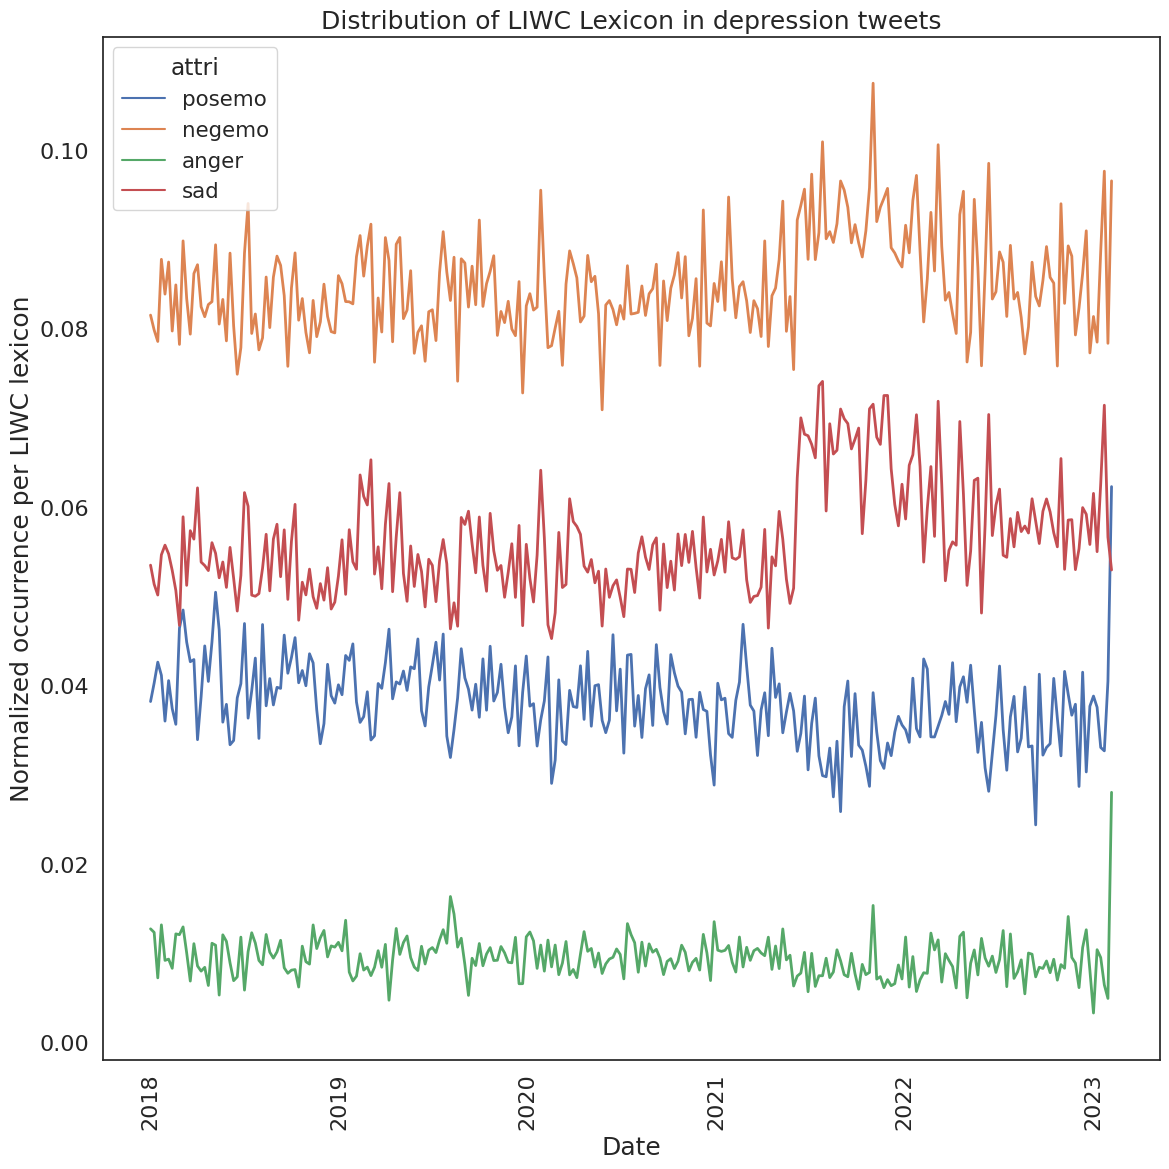

In [ ]:
f, ax = plt.subplots(figsize=(12,12))

bar_plot = sns.lineplot(x= 'date', y = 'value', hue='attri' ,data=depression_summary, lw=2)

bar_plot.tick_params(axis='both', which='major', labelsize=16)

plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Normalized occurrence per LIWC lexicon',fontsize=18)
plt.title('Distribution of LIWC Lexicon in depression tweets',fontsize=18)
plt.tight_layout()
plt.show()

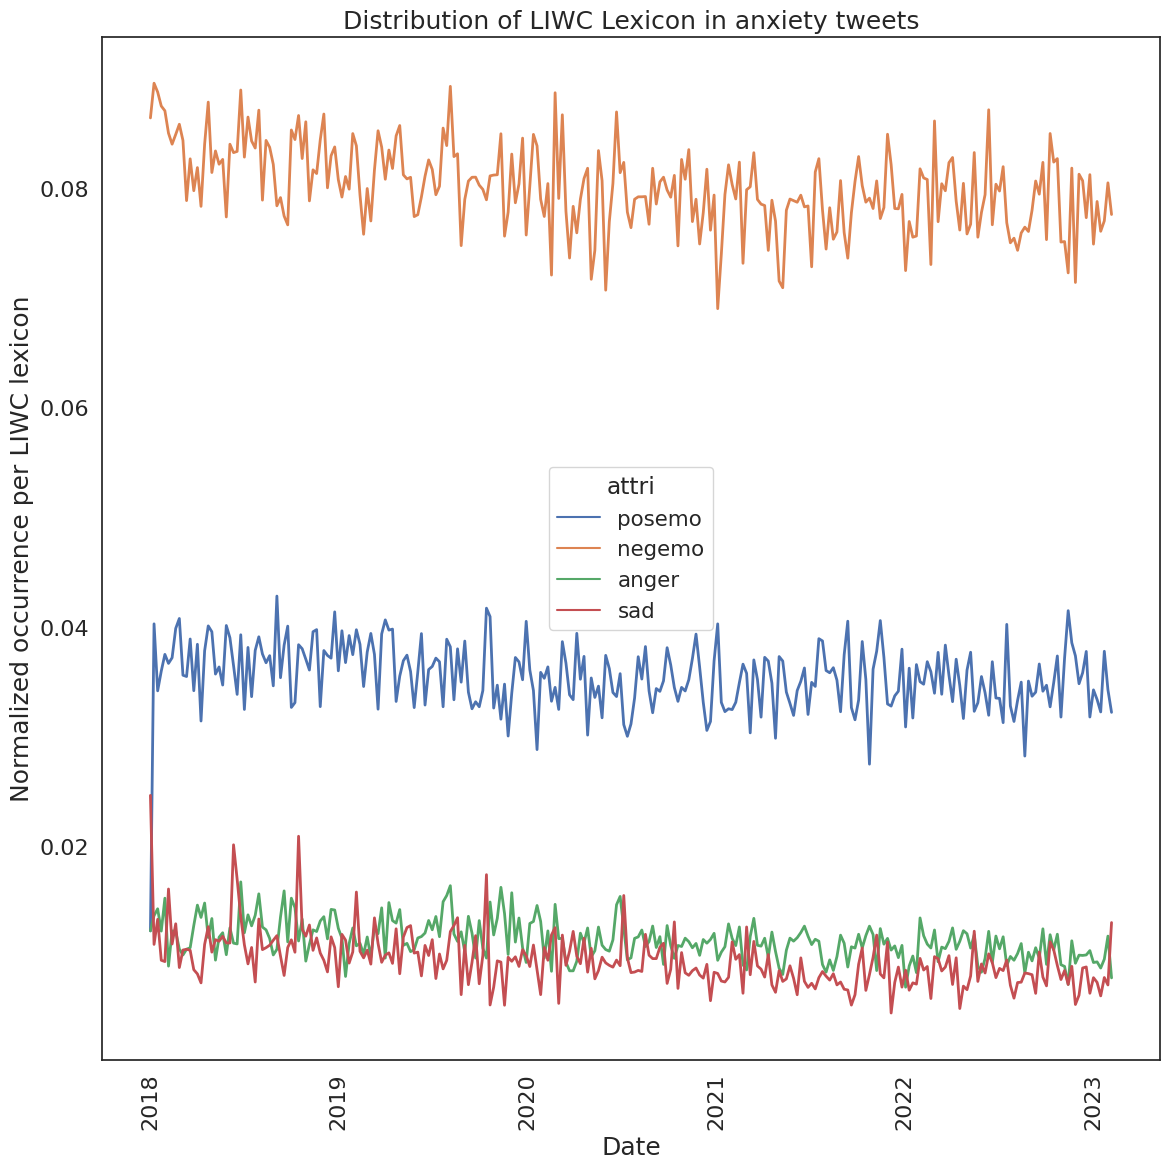

In [ ]:
f, ax = plt.subplots(figsize=(12,12))

bar_plot = sns.lineplot(x= 'date', y = 'value', hue='attri' ,data=anxiety_summary, lw=2)

bar_plot.tick_params(axis='both', which='major', labelsize=16)

plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Normalized occurrence per LIWC lexicon',fontsize=18)
plt.title('Distribution of LIWC Lexicon in anxiety tweets',fontsize=18)
plt.tight_layout()
plt.show()

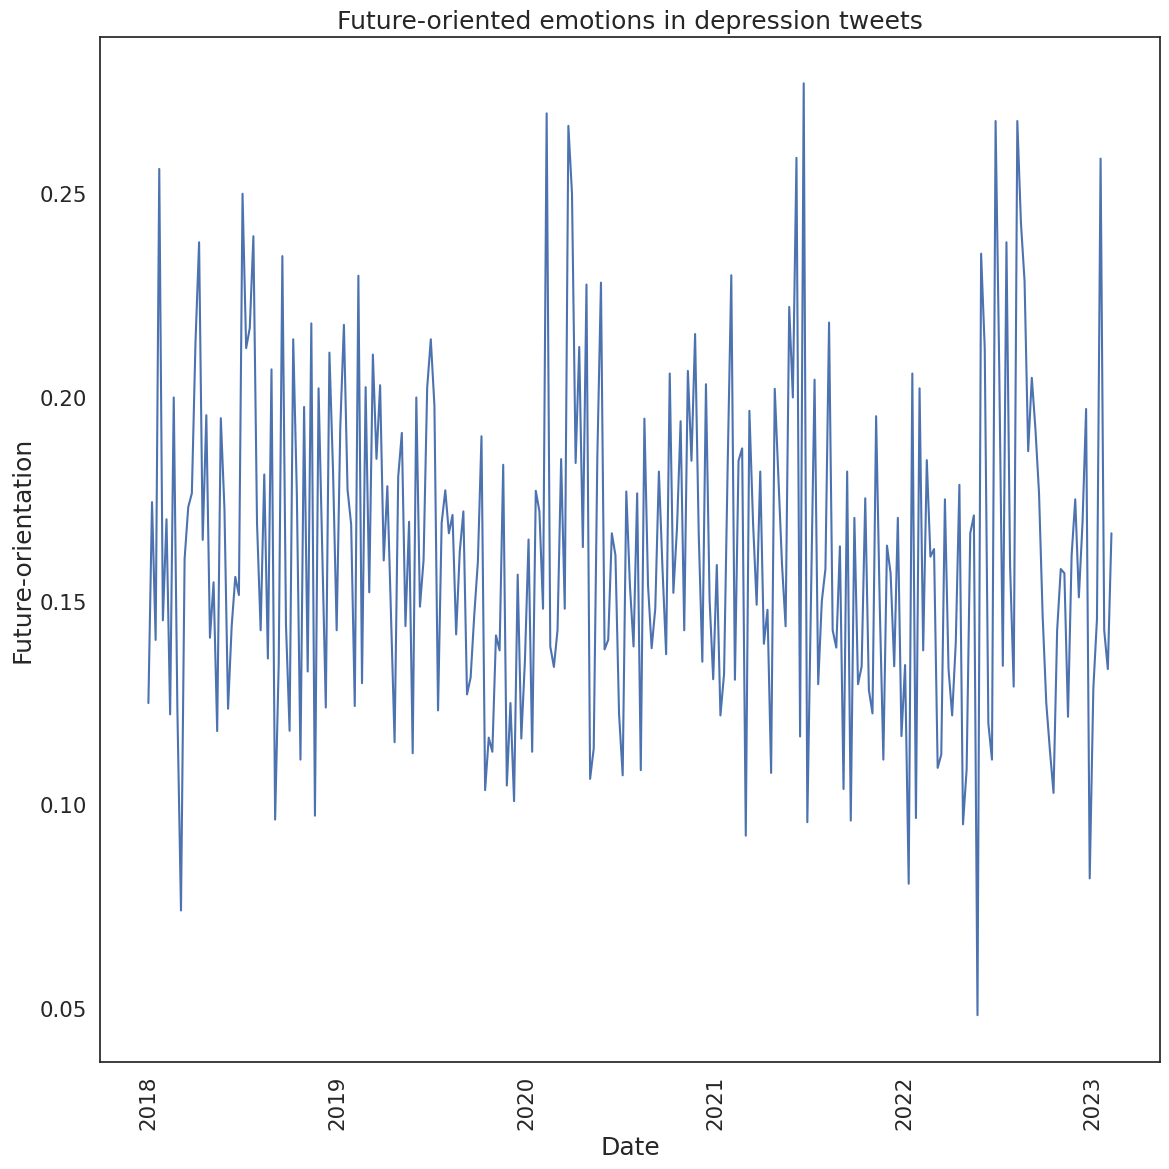

In [ ]:
f, ax = plt.subplots(figsize=(12,12))

depression_forward_looking = None


depression_future_column = depression_LIWC_weekly_sum['future']

depression_sum_future_past = depression_LIWC_weekly_sum['future'] + depression_LIWC_weekly_sum['past']

forward_looking = depression_future_column / depression_sum_future_past

sns.lineplot(x=depression_LIWC_weekly_sum['date'], y=forward_looking)
plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Future-orientation', fontsize=18)
plt.title('Future-oriented emotions in depression tweets', fontsize=18)
plt.tight_layout()
plt.show()

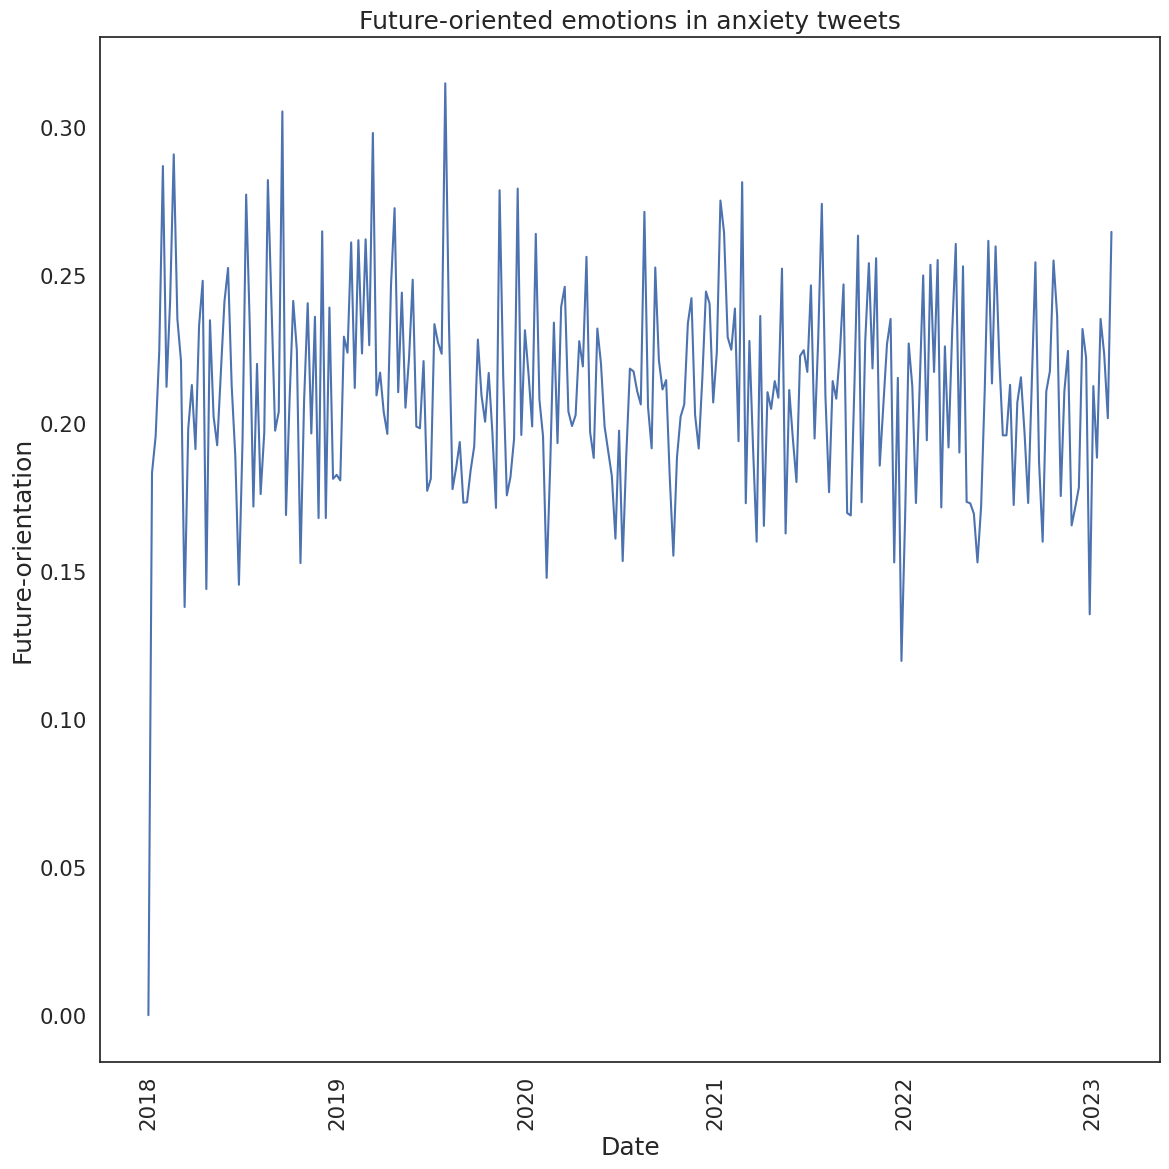

In [ ]:
f, ax = plt.subplots(figsize=(12,12))

anxiety_forward_looking = None


anxiety_future_column = anxiety_LIWC_weekly_sum['future']

anxiety_sum_future_past = anxiety_LIWC_weekly_sum['future'] + anxiety_LIWC_weekly_sum['past']

forward_looking = anxiety_future_column / anxiety_sum_future_past

sns.lineplot(x=anxiety_LIWC_weekly_sum['date'], y=forward_looking)
plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Future-orientation', fontsize=18)
plt.title('Future-oriented emotions in anxiety tweets', fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def sentiment_analyzer(x):
    return analyzer.polarity_scores(x)

def sentiment_Classification(x):
    if x['compound'] >= 0.05:
        return 'positive'
    elif  (x['compound'] > -0.05) and (x['compound'] < 0.05):
        return 'neutral'
    elif x['compound'] <= -0.05  :
        return 'negative'

depression['sentiment'] = depression['tweetCleaned'].apply(sentiment_analyzer)

depression['sentiment_category'] = depression['sentiment'].apply(sentiment_Classification)

anxiety['sentiment'] = anxiety['tweetCleaned'].apply(sentiment_analyzer)

anxiety['sentiment_category'] = anxiety['sentiment'].apply(sentiment_Classification)

In [ ]:
depression['date'] = pd.to_datetime(depression['date'])


In [ ]:
depression.head()


,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,viewCount,tweetCleaned,text_non_stop,word_count,date_no_time,text_non_depression_stop,hour,time_of_day,sentiment,sentiment_category
0,https://twitter.com/KarlWomack3/status/1486792368095379459,2022-01-27 20:04:58+00:00,@FraserNelson At 23 I was forced into making the decision to move into residential care the bullying stopped at the age of 40. I was diagnosed with depression and developed autistic trates.,@FraserNelson At 23 I was forced into making the decision to move into residential care the bullying stopped at the age of 40. I was diagnosed with depression and developed autistic trates.,1.486792e+18,"{'username': 'KarlWomack3', 'id': 906173065356304386, 'displayname': 'Karl Womack(Blaze Burnstar)', 'rawDescription': 'I am a resident in residential care I have a learning disability and physical disabilities. #author #poet #writer. I am a #disabilityrightscampaigner', 'renderedDescription': 'I am a resident in residential care I have a learning disability and physical disabilities. #author #poet #writer. I am a #disabilityrightscampaigner', 'descriptionLinks': None, 'verified': False, 'cre...",1.0,0.0,0.0,0.0,...,NaN,At 23 I was forced into making the decision to move into residential care the bullying stopped at the age of 40 I was diagnosed with depression and developed autistic trates,23 forced making decision move residential care bullying stopped age 40 diagnosed depression developed autistic trates,31,2022-01-27,23 forced making decision move residential care bullying stopped age 40 diagnosed developed autistic trates,20,Late night,"{'neg': 0.3, 'neu': 0.624, 'pos': 0.077, 'compound': -0.8519}",negative
1,https://twitter.com/grffy/status/1442003733307527169,2021-09-26 05:50:55+00:00,i have depression after watching season 4 of dexter,i have depression after watching season 4 of dexter,1.442004e+18,"{'username': 'grffy', 'id': 2416465698, 'displayname': 'griffy', 'rawDescription': '', 'renderedDescription': '', 'descriptionLinks': None, 'verified': False, 'created': datetime.datetime(2014, 3, 28, 21, 12, 26, tzinfo=datetime.timezone.utc), 'followersCount': 1487, 'friendsCount': 134, 'statusesCount': 44010, 'favouritesCount': 2310, 'listedCount': 4, 'mediaCount': 4309, 'location': '', 'protected': False, 'link': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1383644008455...",3.0,0.0,3.0,0.0,...,NaN,i have depression after watching season 4 of dexter,depression watching season 4 dexter,9,2021-09-26,watching season 4 dexter,5,Early morning,"{'neg': 0.316, 'neu': 0.684, 'pos': 0.0, 'compound': -0.5719}",negative
2,https://twitter.com/kaeyamiwk/status/1488414740808634368,2022-02-01 07:31:42+00:00,pretty sure i have depression but maybe its just me being lazy idk,pretty sure i have depression but maybe its just me being lazy idk,1.488415e+18,"{'username': 'kaeyamiwk', 'id': 1085150292763504640, 'displayname': 'nuy⁷🥀 nilou main', 'rawDescription': '🏸\n21+. amigops supremacy. ar60 asia server. kaeya enjoyer', 'renderedDescription': '🏸\n21+. amigops supremacy. ar60 asia server. kaeya enjoyer', 'descriptionLinks': None, 'verified': False, 'created': datetime.datetime(2019, 1, 15, 12, 22, 45, tzinfo=datetime.timezone.utc), 'followersCount': 283, 'friendsCount': 360, 'statusesCount': 27364, 'favouritesCount': 7776, 'listedCount': 7, 'm...",0.0,0.0,1.0,0.0,...,NaN,pretty sure i have depression but maybe its just me being lazy idk,pretty sure depression maybe lazy idk,13,2022-02-01,pretty sure maybe lazy idk,7,Early morning,"{'neg': 0.38, 'neu': 0.422, 'pos': 0.198, 'compound': -0.5346}",negative
3,https://twitter.com/Renkindle/status/1103853075788369928,2019-03-08 03:00:56+00:00,"@BA5ILEUS I strive to be like this, half because my friends are happy and i like seeing them happy, and half because i have depression and trying to be over the top helps","@BA5ILEUS I strive to be like this, half because my friends are happy and 

In [ ]:
anxiety['date'] = pd.to_datetime(anxiety['date'])


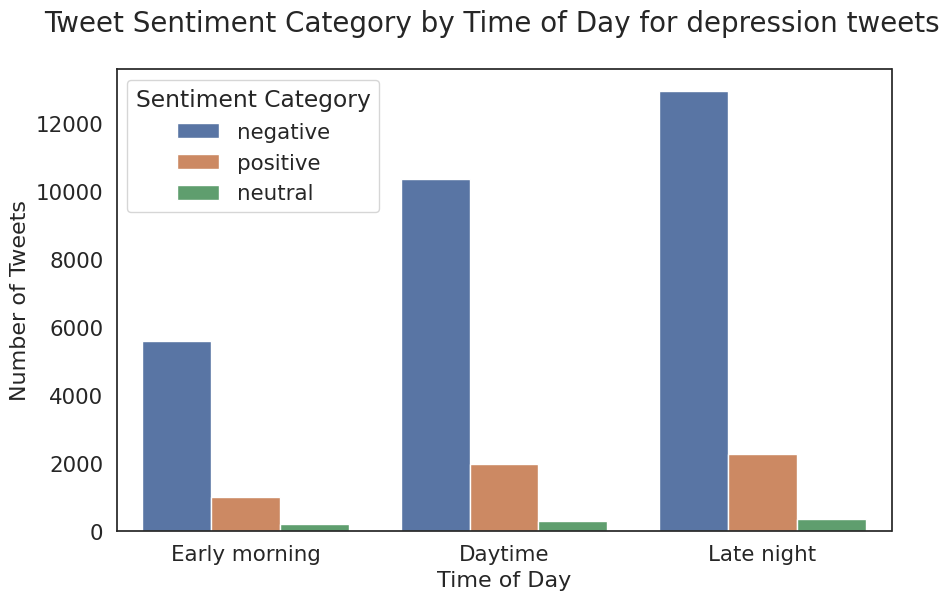

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='time_of_day', hue='sentiment_category', data=depression, order=['Early morning', 'Daytime', 'Late night'])
plt.suptitle("Tweet Sentiment Category by Time of Day for depression tweets", fontsize=20)
ax.set_xlabel("Time of Day", fontsize=16)
ax.set_ylabel("Number of Tweets", fontsize=16)
plt.legend(title='Sentiment Category')
plt.show()

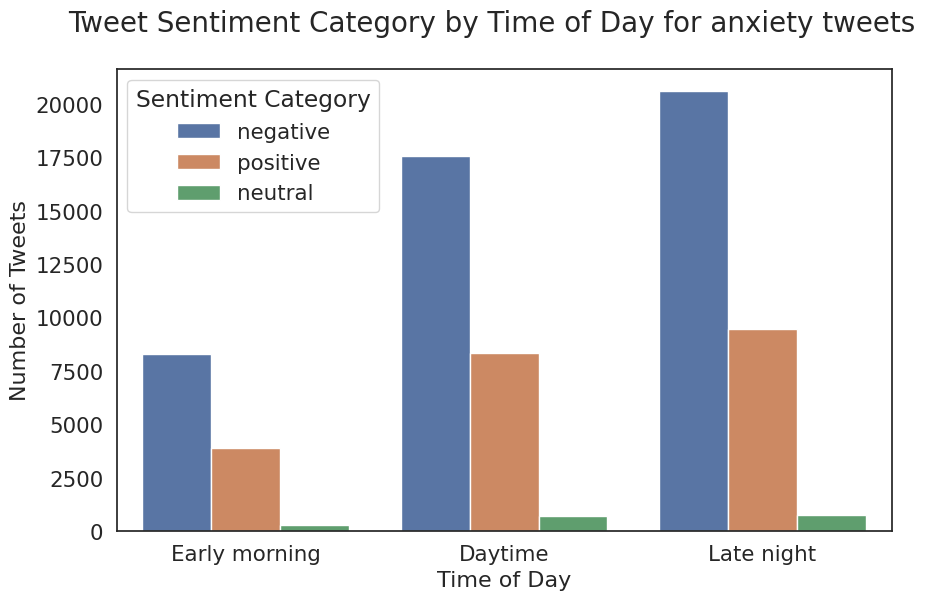

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='time_of_day', hue='sentiment_category', data=anxiety, order=['Early morning', 'Daytime', 'Late night'])
plt.suptitle("Tweet Sentiment Category by Time of Day for anxiety tweets", fontsize=20)
ax.set_xlabel("Time of Day", fontsize=16)
ax.set_ylabel("Number of Tweets", fontsize=16)
plt.legend(title='Sentiment Category')
plt.show()